## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

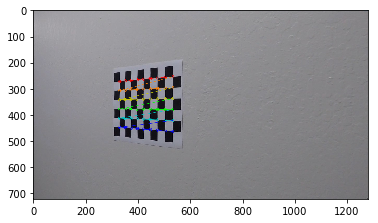

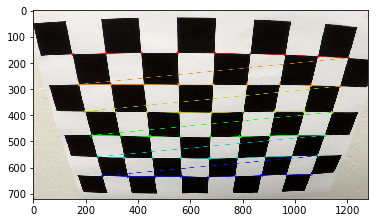

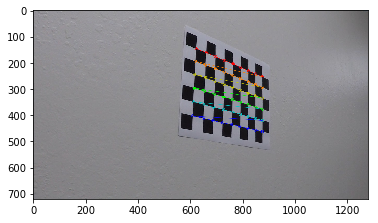

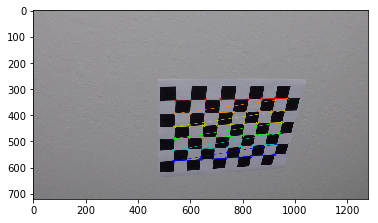

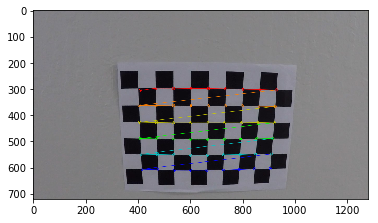

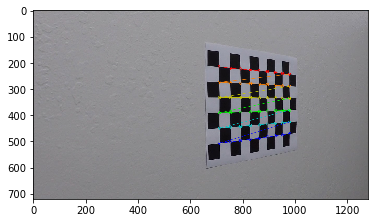

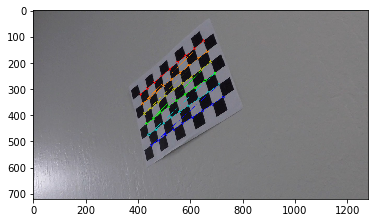

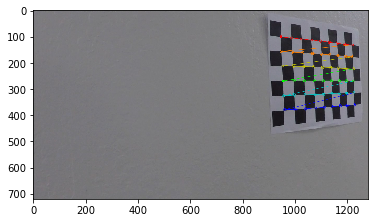

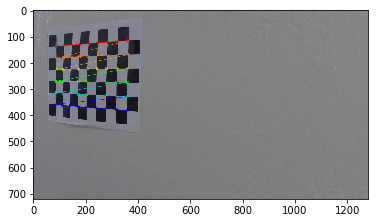

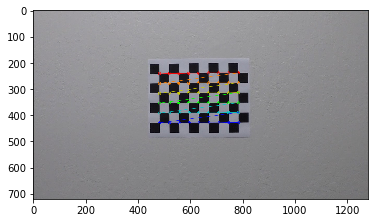

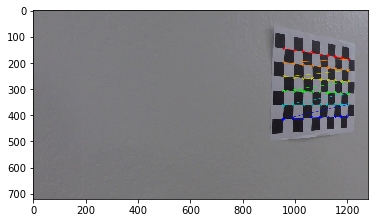

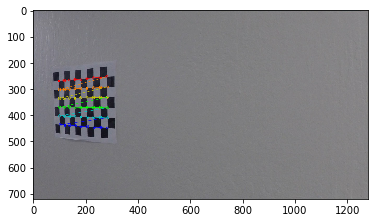

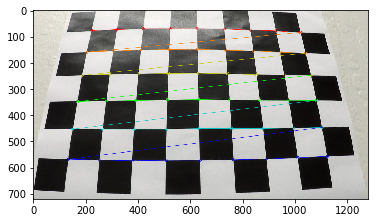

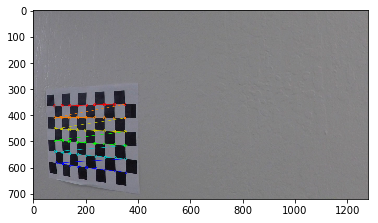

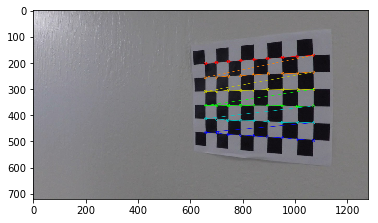

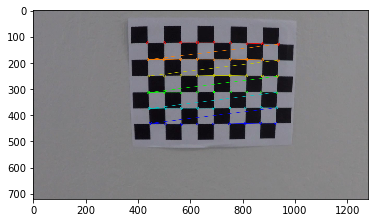

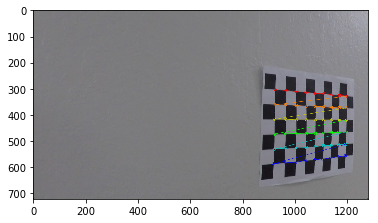

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img.astype('uint8'))
        plt.show()

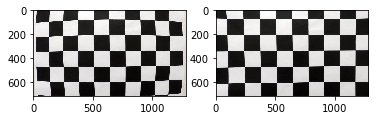

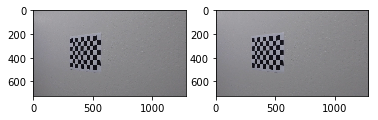

In [2]:
# Perform the camera calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[:2], None, None)
# Perform the image distortion correction
for fname in images[:2]:
    # Read image and undistort
    img = cv2.imread(fname)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    # Convert BRG 2 RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    undist = cv2.cvtColor(undist, cv2.COLOR_BGR2RGB)
    
    # Display images and undistored images
    fig = plt.figure()
    fig.add_subplot(1, 2, 1)
    plt.imshow(img.astype('uint8'))
    fig.add_subplot(1, 2, 2)
    plt.imshow(undist.astype('uint8'))
    plt.show()

## And so on and so forth...

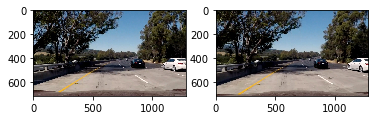

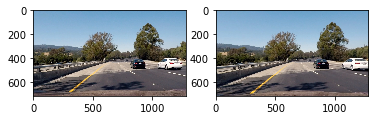

In [3]:
# Make a list of calibration images
images = glob.glob('./test_images/*.jpg')

# Step through the list and search for chessboard corners
for fname in images[:2]:
    # Read image and undistort
    img = cv2.imread(fname)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    # Convert BRG 2 RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    undist = cv2.cvtColor(undist, cv2.COLOR_BGR2RGB)
    
    # Display images and undistored images
    fig = plt.figure()
    fig.add_subplot(1, 2, 1)
    plt.imshow(img.astype('uint8'))
    fig.add_subplot(1, 2, 2)
    plt.imshow(undist.astype('uint8'))
    plt.show()

In [17]:
def get_binary(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    # Convert to HSV color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    # Get binary image
    binary = np.zeros_like(sxbinary)
    binary[sxbinary == 1] = 1
    binary[s_binary == 1] = 1
    
    return binary

In [20]:
bi = get_binary(undist)
bi = np.uint8(255*bi)

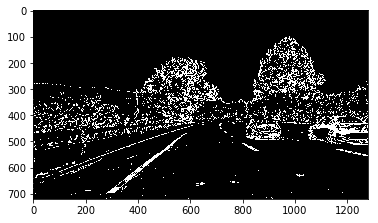

In [25]:
plt.imshow(bi, cmap='gray')

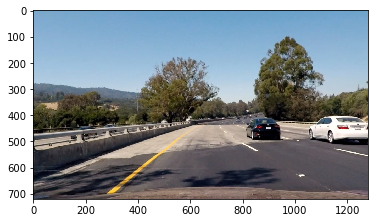

In [26]:
plt.imshow(undist)

In [27]:
undist.shape

(720, 1280, 3)

In [31]:
src = np.float32([[586, 457], [698, 457], [256, 681], [1034, 681]])
dst = np.float32([[350, 0], [1000, 0], [350, 720], [1000, 720]])

In [38]:
M = cv2.getPerspectiveTransform(src, dst)
img_size = (undist.shape[1], undist.shape[0])
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

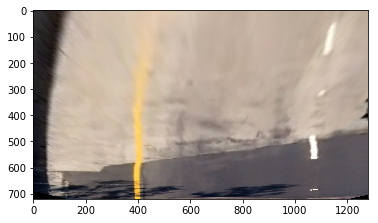

In [39]:
plt.imshow(warped, cmap='gray')